# The deGrom, A Comedic Tragedy


### By William Kang

## Introduction:

Jacob deGrom is a great pitcher for the New York Mets. But for some reason, his team seems to hate him. Despite being one of the best baseball pitchers for the past five years, he does not win as much as his stats would predict. For this project, let's get data on deGrom and compare him to four other really good (within the top 20) starting pitchers chosen because I felt like chosing them (I literally have no other reason): Corey Kluber, Aaron Nola, Gerrit Cole, and Max Scherzer. Then let's compare their teams to explain a little bit of why Jacob deGrom's story was so tragic.

All data in this tutorial is taken from [baseball-reference.com](https://baseball-reference.com).

I will attempt to explain all statitical measures in this tutorial in as if talking to someone with no clue about baseball.

## Data Scraping

To start, we will import some important libraries for this project.

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn import linear_model

Now, let's actually obtain the data. First let's grab the "standard pitching" tables (the tables with all the data a casual analysis would need).

In [2]:
# The player pages for all five players
urlcole = "https://www.baseball-reference.com/players/c/colege01.shtml"
urldegrom = "https://www.baseball-reference.com/players/d/degroja01.shtml"
urlkluber = "https://www.baseball-reference.com/players/k/klubeco01.shtml"
urlscherzer = "https://www.baseball-reference.com/players/s/scherma01.shtml"
urlnola = "https://www.baseball-reference.com/players/n/nolaaa01.shtml"

# let's start with Jacob DeGrom's stats first
pagedegrom = requests.get(urldegrom)
soupdegrom = BeautifulSoup(pagedegrom.content)
tabledegrom = soupdegrom.find("table")
dfdegrom = pd.read_html(str(tabledegrom))[0]
dfdegrom

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Awards
0,2010,22,NYM-min,Rk,1,1,0.500,5.19,6,6,...,115,NaN,NaN,1.577,12.1,0.7,2.1,7.6,3.67,KPT APPY
1,2012,24,NYM-min,"A,A+",9,3,0.750,2.43,19,19,...,450,NaN,NaN,0.997,7.4,0.3,1.6,7.8,4.80,"SAV,SCE SALL,FLOR"
2,2013,25,NYM-min,"AAA,AA,A+",7,7,0.500,4.51,26,26,...,642,NaN,NaN,1.449,10.2,0.7,2.8,7.3,2.61,"LVG,BNG,SCE PCL,EL,FLOR"
3,2014,26,NYM-min,AAA,4,0,1.000,2.58,7,7,...,161,NaN,NaN,1.278,9.2,0.5,2.3,6.8,2.90,LVG PCL
4,2014,26,NYM,NL,9,6,0.600,2.69,22,22,...,565,128.0,2.67,1.140,7.5,0.4,2.8,9.2,3.35,RoY-1
5,2015,27,NYM,NL,14,8,0.636,2.54,30,30,...,751,149.0,2.70,0.979,7.0,0.8,1.8,9.7,5.39,"AS,CYA-7"
6,2016,28,NYM,NL,7,8,0.467,3.04,24,24,...,604,132.0,3.32,1.203,8.6,0.9,2.2,8.7,3.97,NaN
7,2017,29,NYM,NL,15,10,0.600,3.53,31,31,...,827,117.0,3.50,1.187,8.0,1.3,2.6,10.7,4.05,CYA-8
8,2018,30,NYM,NL,10,9,0.526,1.70,32,32,...,835,218.0,1.98,0.912,6.3,0.4,1.9,11.2,5.85,"AS,CYA-1,MVP-5"
9,2019,31,NYM,NL,11,8,0.579,2.43,32,32,...,804,171.0,2.67,0.971,6.8,0.8,1.9,11.3,5.80,"AS,CYA-1,MVP-10"


As we can see, there is a bit of a problem: the table has two rows that are accumulative totals of the ones above. Let's remove them from the dataframe.

In [3]:
indlen = len(dfdegrom.index)
dfdegrom.drop([indlen-2, indlen-1], inplace=True)

Now let's repeat the same process with all of the pages.

In [4]:
# Gerrit Cole
pagecole = requests.get(urlcole)
soupcole = BeautifulSoup(pagecole.content)
tablecole = soupcole.find("table")
dfcole = pd.read_html(str(tablecole))[0]
indlen = len(dfcole.index)
dfcole.drop([indlen-2, indlen-1], inplace=True)

# Corey Kluber
pagekluber = requests.get(urlkluber)
soupkluber = BeautifulSoup(pagekluber.content)
tablekluber = soupkluber.find("table")
dfkluber = pd.read_html(str(tablekluber))[0]
indlen = len(dfkluber.index)
dfkluber.drop([indlen-2, indlen-1], inplace=True)

# Aaron Nola
pagenola = requests.get(urlnola)
soupnola = BeautifulSoup(pagenola.content)
tablenola = soupnola.find("table")
dfnola = pd.read_html(str(tablenola))[0]
indlen = len(dfnola.index)
dfnola.drop([indlen-2, indlen-1], inplace=True)

# Max Scherzer
pagescherzer = requests.get(urlscherzer)
soupscherzer = BeautifulSoup(pagescherzer.content)
tablescherzer = soupscherzer.find("table")
dfscherzer = pd.read_html(str(tablescherzer))[0]
indlen = len(dfscherzer.index)
dfscherzer.drop([indlen-2, indlen-1], inplace=True)

Nice!

## Data management

Now let's create a table to see how terribly the 2018 Mets let deGrom down by extracting the 2018 rows from each of these tables and adding them to a new dataframe. Otherwise, there will be too many variables to compare the stats.

In [5]:
df2018 = pd.concat([dfdegrom.loc[dfdegrom['Year'] == '2018'],
               dfcole.loc[dfcole['Year'] == '2018'],
               dfkluber.loc[dfkluber['Year'] == '2018'],
               dfnola.loc[dfnola['Year'] == '2018'],
               dfscherzer.loc[dfscherzer['Year'] == '2018']])
df2018.insert(0, 'Name', ['deGrom','Cole','Kluber','Nola','Scherzer'])
df2018.reset_index(inplace=True)
df2018

,index,Name,Year,Age,Tm,Lg,W,L,W-L%,ERA,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Awards
0,8,deGrom,2018,30,NYM,NL,10.0,9.0,0.526,1.70,...,835.0,218.0,1.98,0.912,6.3,0.4,1.9,11.2,5.85,"AS,CYA-1,MVP-5"
1,9,Cole,2018,27,HOU,AL,15.0,5.0,0.750,2.88,...,799.0,144.0,2.70,1.033,6.4,0.9,2.9,12.4,4.31,"AS,CYA-5"
2,15,Kluber,2018,32,CLE,AL,20.0,7.0,0.741,2.89,...,842.0,150.0,3.12,0.991,7.5,1.0,1.4,9.3,6.53,"AS,CYA-3"
3,6,Nola,2018,25,PHI,NL,17.0,6.0,0.739,2.37,...,831.0,173.0,3.01,0.975,6.3,0.7,2.5,9.5,3.86,"AS,CYA-3,MVP-13"
4,14,Scherzer,2018,33,WSN,NL,18.0,7.0,0.720,2.53,...,866.0,168.0,2.65,0.911,6.1,0.9,2.1,12.2,5.88,"AS,CYA-2,MVP-10"


Let's drop some stats that I don't think we will need for analysis later. These stats are ones that aren't necessarily useful to graph, as they matter less in the larger picture. Let's drop:

Lg, Age, GS, Year, Awards, GF (Games Finished), CG (Complete Games), SHO (Shutouts), SV (Saves), IP (Innings Pitched), IBB, HBP, BK, WP, and BF.

Specific explanations for why these stats aren't as useful can be found on https://baseball-reference.com.

In [6]:
df2018.drop(['Lg','Age','GS','Year','Awards','GF','CG','SHO','SV','IP','IBB','HBP','BK','WP','BF'],axis=1,inplace=True)
df2018

,index,Name,Tm,W,L,W-L%,ERA,G,H,R,...,BB,SO,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,8,deGrom,NYM,10.0,9.0,0.526,1.70,32.0,152.0,48.0,...,46.0,269.0,218.0,1.98,0.912,6.3,0.4,1.9,11.2,5.85
1,9,Cole,HOU,15.0,5.0,0.750,2.88,32.0,143.0,68.0,...,64.0,276.0,144.0,2.70,1.033,6.4,0.9,2.9,12.4,4.31
2,15,Kluber,CLE,20.0,7.0,0.741,2.89,33.0,179.0,75.0,...,34.0,222.0,150.0,3.12,0.991,7.5,1.0,1.4,9.3,6.53
3,6,Nola,PHI,17.0,6.0,0.739,2.37,33.0,149.0,57.0,...,58.0,224.0,173.0,3.01,0.975,6.3,0.7,2.5,9.5,3.86
4,14,Scherzer,WSN,18.0,7.0,0.720,2.53,33.0,150.0,66.0,...,51.0,300.0,168.0,2.65,0.911,6.1,0.9,2.1,12.2,5.88


Nice! Now we have a lot of data that's a bit tidier. Luckily for us, Baseball Reference is nice and has all the stats we might want already, so there is not much tidying up to do. 

Now, let's restart the data management process with the teams of these pitchers for 2018.

## Data Scraping and Management (Again)

The webpages for these players look like this: https://www.baseball-reference.com/teams/NYM/2018.shtml

Where NYM can be replaced by their team as told above. We will only be obtaining the batting averages of the teams.

In [7]:
# First, let's get their teams
teams = df2018['Tm'].unique()
teamurl = []

# Now let's get the team urls
for team in teams:
    teamurl.append('https://www.baseball-reference.com/teams/' + team + '/2018.shtml')

teamdfs = []
for i in range(0, len(teamurl)):
    page = requests.get(teamurl[i])
    soup = BeautifulSoup(page.content)
    table = soup.find("table")
    df = pd.read_html(str(table))[0]
    # The last five rows are accumulative stats. Although they are nice to have, they also make the table a bit messy:
    # they mess up the formatting of the table. As such, we shall drop them :(
    df.drop(df.tail(5).index,inplace=True)
    # Some names have # or * at the end of them. They mean things (switch hitter and left handed batter respectively)
    # that are unrelated to what we want to look at.
    df['Name'] = df['Name'].apply(lambda x: x[:len(x)-1] if (x[len(x)-1]=='#' or x[len(x)-1]=='*') else x)
    # Also, ignore the rows where Rk == "Rk". These aren't real rows, they just make the rows
    # look nice on their website.
    # Also ignore the rows where Pos == "P". These players are pitchers, and pitchers aren't expected to hit well.
    df = df.loc[(df['Rk']!='Rk') & (df['Pos']!='P')]
    df['R'] = df['R'].astype(int)
    df['PA'] = df['PA'].astype(int)
    df['BA'] = df['BA'].astype(float)
    df['OBP'] = df['OBP'].astype(float)
    df['OPS+'] = df['OPS+'].astype(float)
    teamdfs.append(df)
    
teamdfs[4]

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,C,Matt Wieters,32,76,271,235,24,56,8,...,0.330,.374,.704,86.0,88,5,3,1,2,3
1,2,1B,Ryan Zimmerman,33,85,323,288,33,76,21,...,0.337,.486,.824,114.0,140,10,3,0,2,1
2,3,2B,Wilmer Difo,26,148,456,408,55,94,14,...,0.298,.350,.649,71.0,143,8,2,3,4,5
3,4,SS,Trea Turner,25,162,740,664,103,180,27,...,0.344,.416,.760,100.0,276,7,5,2,0,3
4,5,3B,Anthony Rendon,28,136,597,529,88,163,44,...,0.374,.535,.909,137.0,283,5,5,0,8,5
5,6,LF,Juan Soto,19,116,494,414,77,121,25,...,0.406,.517,.923,142.0,214,9,0,1,0,10
6,7,CF,Michael A. Taylor,27,134,385,353,46,80,22,...,0.287,.357,.644,69.0,126,9,1,2,0,2
7,8,RF,Bryce Harper,25,159,695,550,103,137,34,...,0.393,.496,.889,133.0,273,7,6,0,9,16
9,9,RF,Adam Eaton,29,95,370,319,55,96,18,...,0.394,.411,.805,114.0,131,2,11,2,0,0
10,10,1B,Matt Adams,29,94,277,249,37,64,9,...,0.332,.510,.842,118.0,127,6,4,0,0,2


Now let's tidy up these tables too. We will only care about four stats here: R (runs scored), BA (batting average), OBP (On base percentage), and OPS+ (On base + Slugging (how hard they hit the ball, kinda) percentage but adjusted for each ballpark since different ballparks are of different sizes and thus allow different hits at different rates)

In [8]:
for i in range(0, len(teamdfs)):
    teamdfs[i] = teamdfs[i][['Name','R','PA','BA','OBP','OPS+']]
teamdfs[4]

,Name,R,PA,BA,OBP,OPS+
0,Matt Wieters,24,271,0.238,0.330,86.0
1,Ryan Zimmerman,33,323,0.264,0.337,114.0
2,Wilmer Difo,55,456,0.230,0.298,71.0
3,Trea Turner,103,740,0.271,0.344,100.0
4,Anthony Rendon,88,597,0.308,0.374,137.0
5,Juan Soto,77,494,0.292,0.406,142.0
6,Michael A. Taylor,46,385,0.227,0.287,69.0
7,Bryce Harper,103,695,0.249,0.393,133.0
9,Adam Eaton,55,370,0.301,0.394,114.0
10,Matt Adams,37,277,0.257,0.332,118.0


Nice! Now let's do the process one last time with the team totals in 2018.

In [9]:
url = 'https://www.baseball-reference.com/leagues/MLB/2018-standard-pitching.shtml'
page = requests.get(url)
soup = BeautifulSoup(page.content)
table = soup.find("table")
dfteampitching = pd.read_html(str(table))[0]
dfteampitching = dfteampitching[['Tm','W-L%','ERA','ERA+']]
dfteampitching.drop(dfteampitching.tail(2).index,inplace=True)
dfteampitching['ERA'] = dfteampitching['ERA'].astype(float)
dfteampitching['W-L%'] = dfteampitching['W-L%'].astype(float)
dfteampitching['ERA+'] = dfteampitching['ERA+'].astype(int)
dfteampitching

,Tm,W-L%,ERA,ERA+
0,ARI,0.506,3.72,113
1,ATL,0.556,3.75,110
2,BAL,0.290,5.18,83
3,BOS,0.667,3.75,118
4,CHC,0.583,3.65,115
5,CHW,0.383,4.83,88
6,CIN,0.414,4.63,90
7,CLE,0.562,3.77,115
8,COL,0.558,4.33,109
9,DET,0.395,4.58,98


Nice! We're done with data tidying. Now it's time to analyze the data.

## Data analysis

First let's compare the pitchers: W-L% (win-loss percentage) vs ERA (Earned Run Average, a measure of how many runs pitchers give up on average if the team were to play without errors).

Text(0, 0.5, 'ERA')

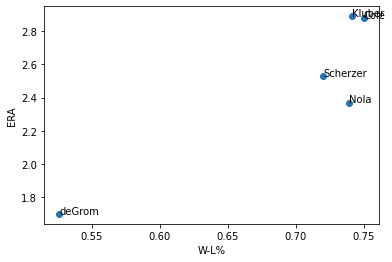

In [10]:
fig, ax = plt.subplots()

ax.scatter(df2018['W-L%'],df2018['ERA'])
for i, name in enumerate(df2018['Name']):
    ax.annotate(name, (df2018.at[i, 'W-L%'], df2018.at[i, 'ERA']))
    
ax.set_xlabel('W-L%')
ax.set_ylabel('ERA')

It looks like deGrom has both the lowest ERA and the lowest W-L%. That's weird - low ERAs mean that the pitcher was really good at not letting the other team score - why doesn't he win more often then? Maybe let's adjust it for the ballpark and the year - let's use ERA+ instead of ERA.

Text(0, 0.5, 'ERA+')

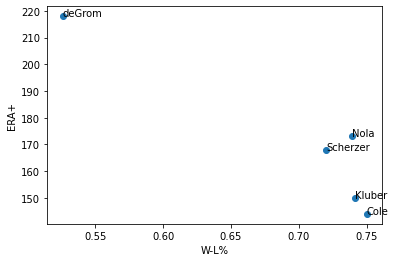

In [11]:
fig2, ax2 = plt.subplots()

ax2.scatter(df2018['W-L%'],df2018['ERA+'])
for i, name in enumerate(df2018['Name']):
    ax2.annotate(name, (df2018.at[i, 'W-L%'], df2018.at[i, 'ERA+']))
    
ax2.set_xlabel('W-L%')
ax2.set_ylabel('ERA+')

Hm... well, deGrom has the highest ERA+. In this case, a higher ERA+ is better. However, the difference between ERA and ERA+ can be seen here, as Kluber's adjusted stat accounts for the fact that the home stadium (the one that his team plays the most in) of his team played in was larger than Cole's.

Regardless, deGrom still has the best stats for a pitcher. Well, maybe let's see how good these pitchers are without their teams, by using FIP (Fielding Independent Pitching), which essentially measures how effective these pitchers would be if they didn't have a team by only accounting for home runs, walks, and strikeouts.

Text(0, 0.5, 'FIP')

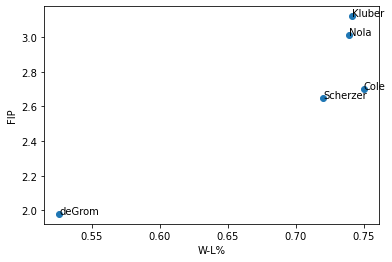

In [12]:
fig3, ax3 = plt.subplots()

ax3.scatter(df2018['W-L%'].astype(float),df2018['FIP'].astype(float))
for i, name in enumerate(df2018['Name']):
    ax3.annotate(name, (df2018.at[i, 'W-L%'], df2018.at[i, 'FIP']))
    
ax3.set_xlabel('W-L%')
ax3.set_ylabel('FIP')

So as it turns out, deGrom was still the best in 2018 if only looking at FIP, since a lower FIP means a more effective pitcher. Well, then why was his W-L% so poor? To answer that, let's look at his team's batting averages.

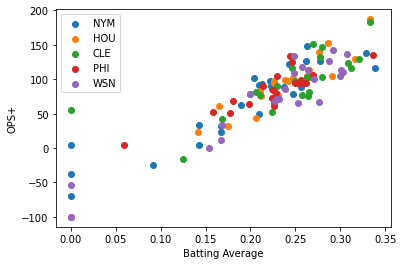

In [13]:
fig4, ax4 = plt.subplots()
for i in range(0,len(teamdfs)):
    ax4.scatter(teamdfs[i]['BA'].astype(float),teamdfs[i]['OPS+'].astype(float), label=teams[i])
        
ax4.set_xlabel('Batting Average')
ax4.set_ylabel('OPS+')
ax4.legend()

There are too many outliers to make much sense of this data, so let's get rid of them. Anyone with less than 50 PA will be cut.

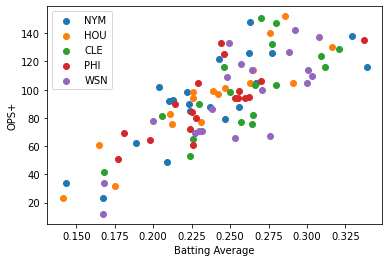

In [14]:
for i in range(0, len(teamdfs)):
    teamdfs[i] = teamdfs[i][teamdfs[i]['PA'] >= 50]

fig5, ax5 = plt.subplots()
for i in range(0,len(teamdfs)):
    ax5.scatter(teamdfs[i]['BA'].astype(float),teamdfs[i]['OPS+'].astype(float), label=teams[i])
        
ax5.set_xlabel('Batting Average')
ax5.set_ylabel('OPS+')
ax5.legend()

Ah. Well that makes a lot more sense: turns out, in 2018, the Mets just sucked. I guess the Mets just really hated Jacob deGrom.

## Machine learning

Well, now that we've shown that deGrom's pretty good at his job, let's see if the 2021 New York Mets will cause another tragedy to occur this year.

Next, let's graph his statlines from previous years, just to show his ability doesn't really correlate with his win percentage.

<AxesSubplot:xlabel='W-L%', ylabel='ERA+'>

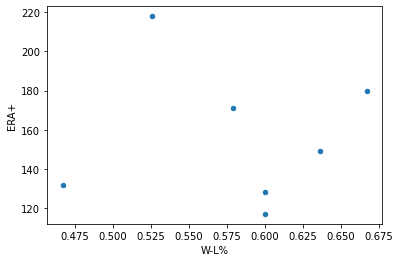

In [15]:
dfdegromscatter = dfdegrom.loc[dfdegrom['Year'].astype(int)!=2021]
dfdegromscatter.plot.scatter('W-L%','ERA+')

That is a little sad. Let's see where deGrom should have stood, if not for his team's offense being horrendous, using the 2018 line.

Text(0, 0.5, 'ERA+')

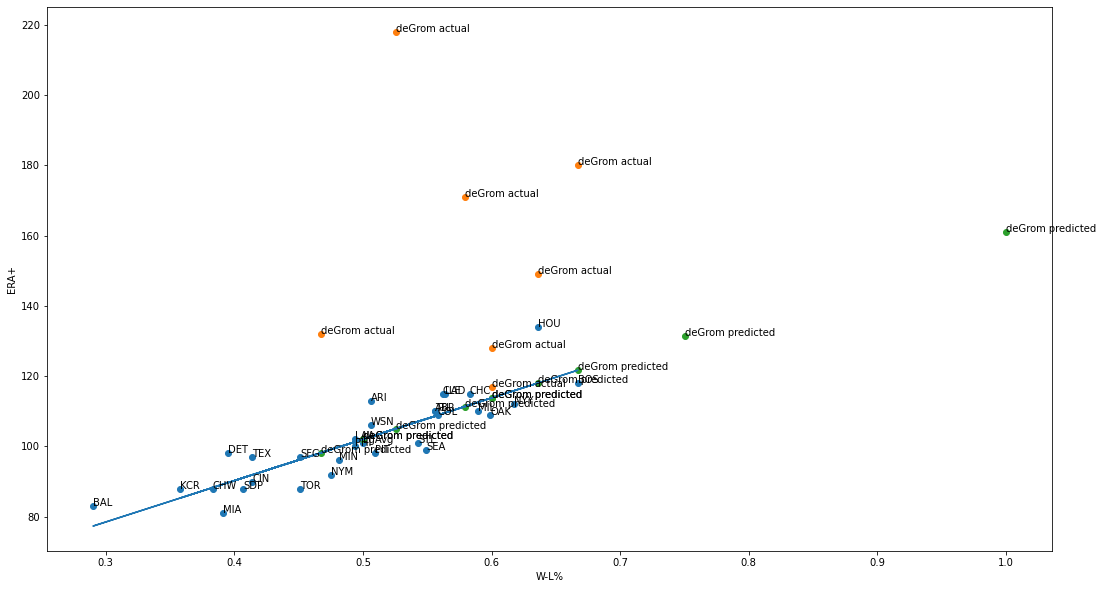

In [16]:
fig7, ax7 = plt.subplots()
fig7.set_size_inches(18, 10)

ax7.scatter(dfteampitching['W-L%'],dfteampitching['ERA+'])
for i, name in enumerate(dfteampitching['Tm']):
    ax7.annotate(name, (dfteampitching.at[i, 'W-L%'], dfteampitching.at[i, 'ERA+']))

reg = linear_model.LinearRegression().fit(np.array(dfteampitching['W-L%']).reshape(-1, 1),dfteampitching['ERA+'])
plt.plot(dfteampitching['W-L%'],reg.intercept_+reg.coef_*dfteampitching['W-L%'])

dfdegrom.drop(dfdegrom.tail(1).index,inplace=True)
ax7.scatter(dfdegrom['W-L%'],dfdegrom['ERA+'])
for i, name in enumerate(dfdegrom['W-L%']):
    ax7.annotate('deGrom actual', (dfdegrom.at[i,'W-L%'],dfdegrom.at[i,'ERA+']))

ax7.scatter(dfdegrom['W-L%'],reg.intercept_+reg.coef_*dfdegrom['W-L%'])
for i, name in enumerate(dfdegrom['W-L%']):
    ax7.annotate('deGrom predicted', (dfdegrom.at[i,'W-L%'],reg.intercept_+reg.coef_*dfdegrom.at[i,'W-L%']))
    
ax7.set_xlabel('W-L%')
ax7.set_ylabel('ERA+')

deGrom looks like he got a bit unlucky. If his ERA+ were to be proportional to his win-loss record, he would only have about a 100 ERA+. Now let's swap the axes and predict deGrom's stats if his team was competent.

deGrom based on his ERA+:[1.25583461]


Text(0.5, 0, 'ERA+')

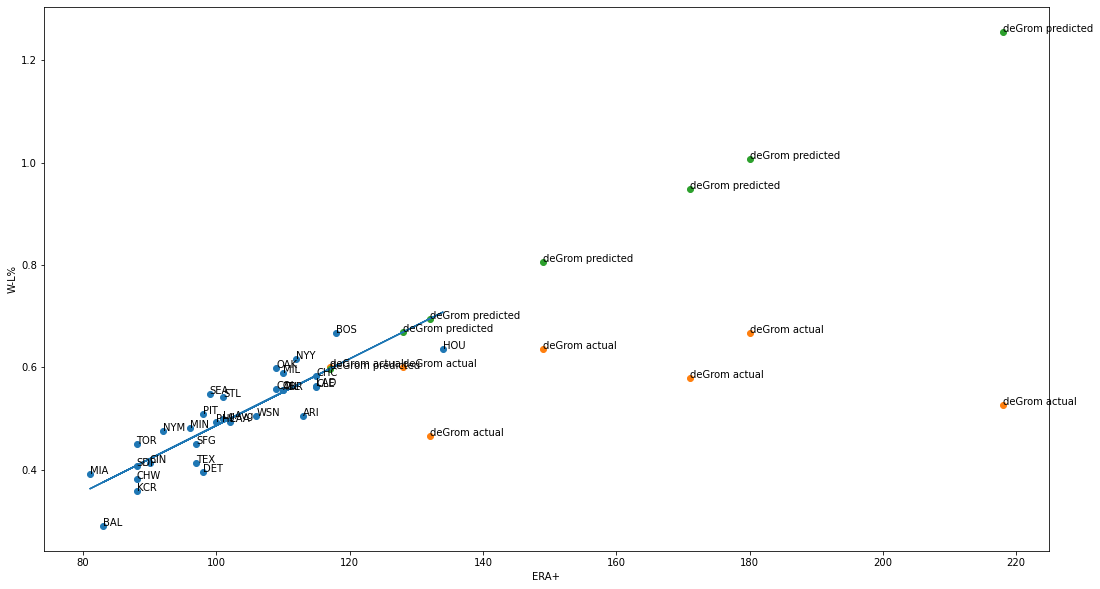

In [17]:
fig8, ax8 = plt.subplots()
fig8.set_size_inches(18, 10)

ax8.scatter(dfteampitching['ERA+'],dfteampitching['W-L%'])
for i, name in enumerate(dfteampitching['Tm']):
    ax8.annotate(name,(dfteampitching.at[i, 'ERA+'],dfteampitching.at[i, 'W-L%']))

reg = linear_model.LinearRegression().fit(np.array(dfteampitching['ERA+']).reshape(-1, 1),np.array(dfteampitching['W-L%']))
plt.plot(dfteampitching['ERA+'],reg.intercept_+reg.coef_*dfteampitching['ERA+'])

ax8.scatter(dfdegrom['ERA+'],dfdegrom['W-L%'])
for i, name in enumerate(dfdegrom['ERA+']):
    ax8.annotate('deGrom actual', (dfdegrom.at[i,'ERA+'],dfdegrom.at[i,'W-L%']))

# Extrapolate
ax8.scatter(dfdegrom['ERA+'],reg.intercept_+reg.coef_*dfdegrom['ERA+'])
for i, name in enumerate(dfdegrom['ERA+']):
    ax8.annotate('deGrom predicted', (dfdegrom.at[i,'ERA+'],reg.intercept_+reg.coef_*dfdegrom.at[i,'ERA+']))

print('deGrom based on his ERA+:' + str(reg.intercept_+reg.coef_*df2018.at[0,'ERA+']))
    
ax8.set_ylabel('W-L%')
ax8.set_xlabel('ERA+')

That over 120% W-L percentage tells quite the story of how horribly deGrom was failed by the Mets in 2018. In theory, deGrom would've gotten negative!! losses in 2018 for how well he pitched. Unfortunately for deGrom, baseball is a team sport. The Mets sucked (still do a bit), and deGrom was only destined to win 10 of his games that season.

### Some ending notes:

Of course, I could have included more pitchers in my analysis above of deGrom's pitching ability in 2018, but the point of that was not to show that he was elite, but rather to show that he was as good, if not better than other pitchers with worse stats. I believe those three graphs were good enough to show that deGrom should've had a better win-loss percentage than the Mets had given him that year.

I am not sure how OPS+ and ERA+ calculate weights for ballparks. I just know it's a standardized stat. Curse you variable baseball stadium sizes!

OPS+ and ERA+ account for the year by using the league average for that year.

W-L% ignores no-decisions, which are games where the pitcher leaves the mound before either team has a lead. Those games are awarded as wins or losses to the relief pitchers, who come into the game after the starters (like deGrom) have pitched. After all, if the relief pitcher gives up 7 runs, that's not your fault, that's the relief pitcher's fault.